Install and Import classes for reading the web page and pandas

In [8]:
import pandas as pd
import numpy as np
import requests

#!conda install -c anaconda beautifulsoup4
from bs4 import BeautifulSoup

Get page contents into variable

In [9]:
wikilink = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
parsere = BeautifulSoup(wikilink, 'html5lib')
print(parsere.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xm3WfgpAMMUAATIesy8AAADB","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":945633050,"wgRevisionId":945633050,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Article

In [10]:
postal_codes_dict = {} # initialize an empty dictionary to save the data in

Fetch the table from page

In [11]:
My_table = parsere.find('table',{'class':'wikitable sortable'})
My_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Harbourfront</a>
</td></tr>
<tr>
<td>M6A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Lawrence_Heights" title="Lawrence Heights">Lawrence Heights</a>
</td></tr>
<tr>
<td>M6A</td>
<td><a href="/wiki/North

Store value of table in dictionary 

In [12]:
for table_row in My_table.find_all('tr'):
    try:
        table_cells = table_row.find_all('td')
        if len(table_cells) > 1:
            postal_code_data = table_cells[0].text # get the postal code
            print ("postal code:"+postal_code_data)
            neighborhoods_data = table_cells[2].text.strip('\n') # get the rest of the data in the cell
            print ("neighborhoods_data:"+neighborhoods_data)
            borough_data = table_cells[1].text # get the borough in the cell
            print ("borough:"+borough_data)
                   
            # if the cell is not assigned then ignore it
            if borough_data == 'Not assigned':
                print ("no borough")
            # else process the data and add it to the dictionary
            else:           
                if neighborhoods_data == 'Not assigned':
                    neighborhoods_data = borough_data 
                
                print ("If exists")
                if postal_code_data in postal_codes_dict:
                    print (postal_code_data)
                    postal_codes_dict[postal_code_data]['borough'] = borough_data
                    postal_codes_dict[postal_code_data]['neighborhoods'] = postal_codes_dict[postal_code_data]['neighborhoods'] + "," +neighborhoods_data
                else:
                    postal_codes_dict[postal_code_data] = {}
                    # add borough and neighborhood to dictionary
                    postal_codes_dict[postal_code_data]['borough'] = borough_data
                    postal_codes_dict[postal_code_data]['neighborhoods'] = neighborhoods_data
    except:
            print ("error")

postal code:M1A
neighborhoods_data:Not assigned
borough:Not assigned
no borough
postal code:M2A
neighborhoods_data:Not assigned
borough:Not assigned
no borough
postal code:M3A
neighborhoods_data:Parkwoods
borough:North York
If exists
postal code:M4A
neighborhoods_data:Victoria Village
borough:North York
If exists
postal code:M5A
neighborhoods_data:Harbourfront
borough:Downtown Toronto
If exists
postal code:M6A
neighborhoods_data:Lawrence Heights
borough:North York
If exists
postal code:M6A
neighborhoods_data:Lawrence Manor
borough:North York
If exists
M6A
postal code:M7A
neighborhoods_data:Queen's Park
borough:Downtown Toronto
If exists
postal code:M8A
neighborhoods_data:Not assigned
borough:Not assigned
no borough
postal code:M9A
neighborhoods_data:Islington Avenue
borough:Etobicoke
If exists
postal code:M1B
neighborhoods_data:Rouge
borough:Scarborough
If exists
postal code:M1B
neighborhoods_data:Malvern
borough:Scarborough
If exists
M1B
postal code:M2B
neighborhoods_data:Not assigned

In [13]:
# create an empty dataframe
columns = ['PostalCode', 'Borough', 'Neighborhood']
toronto_data = pd.DataFrame(columns=columns)

In [14]:
for ind, postal_code_data in enumerate(postal_codes_dict):
    borough = postal_codes_dict[postal_code_data]['borough']
    neighborhood = postal_codes_dict[postal_code_data]['neighborhoods']
    toronto_data = toronto_data.append({"PostalCode": postal_code_data, 
                                        "Borough": borough, 
                                        "Neighborhood": neighborhood},
                                        ignore_index=True)

Data Frame with neighborhood

In [15]:
toronto_data

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights,Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge,Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens,Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson,Garden District"


Get number of rows with help of shape object

In [16]:
print ("Total rows:" + str(toronto_data.shape[0]))

Total rows:103


Get the latitude and the longitude coordinates of each neighborhood

In [17]:
data = pd.read_csv('http://cocl.us/Geospatial_data')
print (data)

    Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.782736 -79.442259
25          

## Data Frame with Data containing Neighborhood and there lat/long

In [18]:
df_merge_col = pd.merge(toronto_data, data,how='left', left_on='PostalCode', right_on='Postal Code')
df_merge_col.drop(['Postal Code'], axis=1)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens,Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937


## Below code is for Explore and cluster the neighborhoods in Toronto.

In [20]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ------------------------------------------------------------
                       

In [21]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [22]:
# create map of toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_merge_col['Latitude'], df_merge_col['Longitude'], df_merge_col['Borough'], df_merge_col['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Foursquare credentials for connecting with API

In [23]:
CLIENT_ID = 'PYIGTU5WJ4IJEJPNL5VNRYL4JVQUNUPSVRO5MCBMK3HWICSE' # your Foursquare ID
CLIENT_SECRET = 'PWHAP14QRBMBYPVMFI5XRF0WAHTO5HYEMTVPVNTBUTRBSE2I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PYIGTU5WJ4IJEJPNL5VNRYL4JVQUNUPSVRO5MCBMK3HWICSE
CLIENT_SECRET:PWHAP14QRBMBYPVMFI5XRF0WAHTO5HYEMTVPVNTBUTRBSE2I


##### Check values of row 0 from data frame

In [24]:
neighborhood_latitude = df_merge_col.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_merge_col.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_merge_col.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


##### Based on values of row 0 check api returns the needed values

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=PYIGTU5WJ4IJEJPNL5VNRYL4JVQUNUPSVRO5MCBMK3HWICSE&client_secret=PWHAP14QRBMBYPVMFI5XRF0WAHTO5HYEMTVPVNTBUTRBSE2I&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e71b3cfc94979001be80aa0'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,id,name,categories,lat,lng
0,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,Park,43.751976,-79.332140
1,4cb11e2075ebb60cd1c4caad,Variety Store,Food & Drink Shop,43.751974,-79.333114
2,53622a89498ed84d6853265e,TTC stop - 44 Valley Woods,Bus Stop,43.755402,-79.333741


In [31]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


#### Define funtion for geting Venues in Neighbourhood

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
toronto_venues = getNearbyVenues(names=df_merge_col['Neighborhood'],
                                   latitudes=df_merge_col['Latitude'],
                                   longitudes=df_merge_col['Longitude']
                                  )

In [50]:
print(toronto_venues.shape)
#toronto_venues[toronto_venues['Venue Category']=="Indian Restaurant"]
toronto_venues

(2226, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,4cb11e2075ebb60cd1c4caad,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,53622a89498ed84d6853265e,TTC stop - 44 Valley Woods,43.755402,-79.333741,Bus Stop
3,Victoria Village,43.725882,-79.315572,4c633acb86b6be9a61268e34,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,4bbe904a85fbb713420d7167,Tim Hortons,43.725517,-79.313103,Coffee Shop
5,Victoria Village,43.725882,-79.315572,4f3ecce6e4b0587016b6f30d,Portugril,43.725819,-79.312785,Portuguese Restaurant
6,Victoria Village,43.725882,-79.315572,51e594d5498e07837484f577,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
7,Harbourfront,43.654260,-79.360636,54ea41ad498e9a11e9e13308,Roselle Desserts,43.653447,-79.362017,Bakery
8,Harbourfront,43.654260,-79.360636,53b8466a498e83df908c3f21,Tandem Coffee,43.653559,-79.361809,Coffee Shop
9,Harbourfront,43.654260,-79.360636,574c229e498ebb5c6b257902,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center


In [199]:
toronto_venues.assign(Is_Indian = toronto_venues['Venue Category'])

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Is_Indian
0,Parkwoods,43.753259,-79.329656,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,43.751976,-79.332140,Park,Park
1,Parkwoods,43.753259,-79.329656,4cb11e2075ebb60cd1c4caad,Variety Store,43.751974,-79.333114,Food & Drink Shop,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,53622a89498ed84d6853265e,TTC stop - 44 Valley Woods,43.755402,-79.333741,Bus Stop,Bus Stop
3,Victoria Village,43.725882,-79.315572,4c633acb86b6be9a61268e34,Victoria Village Arena,43.723481,-79.315635,Hockey Arena,Hockey Arena
4,Victoria Village,43.725882,-79.315572,4bbe904a85fbb713420d7167,Tim Hortons,43.725517,-79.313103,Coffee Shop,Coffee Shop
5,Victoria Village,43.725882,-79.315572,4f3ecce6e4b0587016b6f30d,Portugril,43.725819,-79.312785,Portuguese Restaurant,Portuguese Restaurant
6,Victoria Village,43.725882,-79.315572,51e594d5498e07837484f577,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection,Intersection
7,Harbourfront,43.654260,-79.360636,54ea41ad498e9a11e9e13308,Roselle Desserts,43.653447,-79.362017,Bakery,Bakery
8,Harbourfront,43.654260,-79.360636,53b8466a498e83df908c3f21,Tandem Coffee,43.653559,-79.361809,Coffee Shop,Coffee Shop
9,Harbourfront,43.654260,-79.360636,574c229e498ebb5c6b257902,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center,Distribution Center


In [206]:
toronto_venues.loc[toronto_venues['Venue Category'] == 'Indian Restaurant', 'Is_Indian'] = 1

In [207]:
toronto_venues.loc[toronto_venues['Venue Category'] != 'Indian Restaurant', 'Is_Indian'] = 0

In [208]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Is_Indian
0,Parkwoods,43.753259,-79.329656,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,43.751976,-79.332140,Park,0.0
1,Parkwoods,43.753259,-79.329656,4cb11e2075ebb60cd1c4caad,Variety Store,43.751974,-79.333114,Food & Drink Shop,0.0
2,Parkwoods,43.753259,-79.329656,53622a89498ed84d6853265e,TTC stop - 44 Valley Woods,43.755402,-79.333741,Bus Stop,0.0
3,Victoria Village,43.725882,-79.315572,4c633acb86b6be9a61268e34,Victoria Village Arena,43.723481,-79.315635,Hockey Arena,0.0
4,Victoria Village,43.725882,-79.315572,4bbe904a85fbb713420d7167,Tim Hortons,43.725517,-79.313103,Coffee Shop,0.0
5,Victoria Village,43.725882,-79.315572,4f3ecce6e4b0587016b6f30d,Portugril,43.725819,-79.312785,Portuguese Restaurant,0.0
6,Victoria Village,43.725882,-79.315572,51e594d5498e07837484f577,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection,0.0
7,Harbourfront,43.654260,-79.360636,54ea41ad498e9a11e9e13308,Roselle Desserts,43.653447,-79.362017,Bakery,0.0
8,Harbourfront,43.654260,-79.360636,53b8466a498e83df908c3f21,Tandem Coffee,43.653559,-79.361809,Coffee Shop,0.0
9,Harbourfront,43.654260,-79.360636,574c229e498ebb5c6b257902,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center,0.0


In [183]:
toronto_venues.shape[0]

2226

In [47]:
#toronto_venues[toronto_venues['Venue Category']=="Indian Restaurant"].groupby('Neighborhood').count().reset_index()

In [216]:
toronto_indian_venues = toronto_venues[toronto_venues['Venue Category']=="Indian Restaurant"].reset_index()
toronto_indian_venues

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category,Is_Indian
0,531,Central Bay Street,43.657952,-79.387383,57c07e5f498ed3724a049dc1,Colaba Junction,43.660940,-79.385635,Indian Restaurant,1.0
1,615,Thorncliffe Park,43.705369,-79.349372,4daf08e66e81e2dffdd4fe40,Iqbal Kebab & Sweet Centre,43.705923,-79.351521,Indian Restaurant,1.0
2,622,Thorncliffe Park,43.705369,-79.349372,4bed9f2fbac3c9b6ad93fee9,Hakka Garden,43.704578,-79.349770,Indian Restaurant,1.0
3,915,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752,50b79b94e4b0a577af25a83f,Indian Roti House,43.639060,-79.385422,Indian Restaurant,1.0
4,1349,"Bedford Park,Lawrence Manor East",43.733283,-79.419750,4d796616542ab1f75eb87c41,The Copper Chimney,43.736195,-79.420271,Indian Restaurant,1.0
5,1432,"Dorset Park,Scarborough Town Centre,Wexford He...",43.757410,-79.273304,5226562611d2cd49d83ef03b,Kairali,43.754915,-79.276945,Indian Restaurant,1.0
6,1433,"Dorset Park,Scarborough Town Centre,Wexford He...",43.757410,-79.273304,4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant,1.0
7,1521,"The Annex,North Midtown,Yorkville",43.672710,-79.405678,4c62c59ce1621b8dd0332453,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant,1.0
8,1580,Davisville,43.704324,-79.388790,5169d445e4b07de190b5c3d6,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant,1.0
9,1856,L'Amoreaux West,43.799525,-79.318389,4efccc9bb8f701ff611ce191,Nantha's Bakery,43.796430,-79.319151,Indian Restaurant,1.0


In [210]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 267 uniques categories.


In [218]:
toronto_indian_venues['Venue ID'][0]

'57c07e5f498ed3724a049dc1'

### for venue details

In [278]:
CLIENT_ID = 'B3PGG3GXKUJR3JCCRH5DX1HIH1JEGI4A31X2VBPF1GUHP2UO' # your Foursquare ID
CLIENT_SECRET = 'EWZYAOIY0RRQWYFOUOURACT1TQ22IZUNXOQ4ZIKCQRCXYTRD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B3PGG3GXKUJR3JCCRH5DX1HIH1JEGI4A31X2VBPF1GUHP2UO
CLIENT_SECRET:EWZYAOIY0RRQWYFOUOURACT1TQ22IZUNXOQ4ZIKCQRCXYTRD


In [279]:
length = toronto_venues.shape[0]

for i in range(length):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
    toronto_venues['Venue ID'][i],
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
    url # display URL

    #results = requests.get(url).json()
    results= requests.get(url).json()
    print (i)
    
    try:
        rating = results['response']['venue']['rating']
    except:
        rating = np.nan
        
    try:
        price = results['response']['venue']['price']['tier']
    except:
        price = np.nan  
        
    # return only relevant information for each nearby venue
    venues_details.append([(
    toronto_venues['Venue ID'][i],
    results['response']['venue']['name'], 
    results['response']['venue']['location']['lat'], 
    results['response']['venue']['location']['lng'],
    results['response']['venue']['stats']['tipCount'],
    rating,
    results['response']['venue']['likes']['count'],
    price)])

venuesdtls = pd.DataFrame([item for venue_details in venues_details for item in venue_details])
venuesdtls.columns = [
              'Venue ID', 'Venue', 'Venue Latitude', 'Venue Longitude', 
              'Venue Tips Count', 'Venue Rating', 
              'Likes Count', 'Venue Price Tier']

2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225


In [280]:
venues_details

[[('4e8d9dcdd5fbbbb6b3003c7b',
   'Brookbanks Park',
   43.751976046055574,
   -79.33214044722958,
   4,
   7.1,
   12,
   nan)],
 [('4cb11e2075ebb60cd1c4caad',
   'Variety Store',
   43.75197441585782,
   -79.33311418516017,
   1,
   nan,
   0,
   nan)],
 [('53622a89498ed84d6853265e',
   'TTC stop - 44 Valley Woods',
   43.75540238129278,
   -79.33374133300899,
   0,
   nan,
   0,
   nan)],
 [('4c633acb86b6be9a61268e34',
   'Victoria Village Arena',
   43.72348055545508,
   -79.31563520925143,
   4,
   7.6,
   7,
   nan)],
 [('4bbe904a85fbb713420d7167',
   'Tim Hortons',
   43.725516631714754,
   -79.31310251366091,
   7,
   6.2,
   21,
   1)],
 [('4f3ecce6e4b0587016b6f30d',
   'Portugril',
   43.72581876267242,
   -79.31278541470671,
   12,
   6.0,
   5,
   2)],
 [('51e594d5498e07837484f577',
   'Eglinton Ave E & Sloane Ave/Bermondsey Rd',
   43.726086,
   -79.31362,
   0,
   nan,
   0,
   nan)],
 [('54ea41ad498e9a11e9e13308',
   'Roselle Desserts',
   43.653446723052674,
   -79.3620

In [283]:
venuesdtls.shape[0]

2262

In [284]:
venuesdtls

,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Tips Count,Venue Rating,Likes Count,Venue Price Tier
0,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,43.751976,-79.332140,4,7.1,12,NaN
1,4cb11e2075ebb60cd1c4caad,Variety Store,43.751974,-79.333114,1,NaN,0,NaN
2,53622a89498ed84d6853265e,TTC stop - 44 Valley Woods,43.755402,-79.333741,0,NaN,0,NaN
3,4c633acb86b6be9a61268e34,Victoria Village Arena,43.723481,-79.315635,4,7.6,7,NaN
4,4bbe904a85fbb713420d7167,Tim Hortons,43.725517,-79.313103,7,6.2,21,1.0
5,4f3ecce6e4b0587016b6f30d,Portugril,43.725819,-79.312785,12,6.0,5,2.0
6,51e594d5498e07837484f577,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,0,NaN,0,NaN
7,54ea41ad498e9a11e9e13308,Roselle Desserts,43.653447,-79.362017,15,9.0,47,1.0
8,53b8466a498e83df908c3f21,Tandem Coffee,43.653559,-79.361809,22,8.9,49,1.0
9,574c229e498ebb5c6b257902,Cooper Koo Family YMCA,43.653249,-79.358008,2,8.4,18,NaN


In [285]:
venuesdtls_1=venuesdtls
df_merge_col.drop(['Postal Code'], axis=1)

In [287]:

venues_merged = pd.merge(venuesdtls, toronto_venues,how='left', left_on='Venue ID', right_on='Venue ID')


,Venue ID,Venue_x,Venue Latitude_x,Venue Longitude_x,Venue Tips Count,Venue Rating,Likes Count,Venue Price Tier,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue_y,Venue Latitude_y,Venue Longitude_y,Venue Category,Is_Indian
0,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,43.751976,-79.332140,4,7.1,12,NaN,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,0.0
1,4cb11e2075ebb60cd1c4caad,Variety Store,43.751974,-79.333114,1,NaN,0,NaN,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop,0.0
2,53622a89498ed84d6853265e,TTC stop - 44 Valley Woods,43.755402,-79.333741,0,NaN,0,NaN,Parkwoods,43.753259,-79.329656,TTC stop - 44 Valley Woods,43.755402,-79.333741,Bus Stop,0.0
3,4c633acb86b6be9a61268e34,Victoria Village Arena,43.723481,-79.315635,4,7.6,7,NaN,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena,0.0
4,4bbe904a85fbb713420d7167,Tim Hortons,43.725517,-79.313103,7,6.2,21,1.0,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,0.0
5,4f3ecce6e4b0587016b6f30d,Portugril,43.725819,-79.312785,12,6.0,5,2.0,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,0.0
6,51e594d5498e07837484f577,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,0,NaN,0,NaN,Victoria Village,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection,0.0
7,54ea41ad498e9a11e9e13308,Roselle Desserts,43.653447,-79.362017,15,9.0,47,1.0,Harbourfront,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,0.0
8,53b8466a498e83df908c3f21,Tandem Coffee,43.653559,-79.361809,22,8.9,49,1.0,Harbourfront,43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop,0.0
9,574c229e498ebb5c6b257902,Cooper Koo Family YMCA,43.653249,-79.358008,2,8.4,18,NaN,Harbourfront,43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center,0.0


In [289]:
venues_merged.assign(Is_Restaurent = venues_merged['Venue Category'])

,Venue ID,Venue_x,Venue Latitude_x,Venue Longitude_x,Venue Tips Count,Venue Rating,Likes Count,Venue Price Tier,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue_y,Venue Latitude_y,Venue Longitude_y,Venue Category,Is_Indian,Is_Restaurent
0,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,43.751976,-79.332140,4,7.1,12,NaN,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,0.0,Park
1,4cb11e2075ebb60cd1c4caad,Variety Store,43.751974,-79.333114,1,NaN,0,NaN,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop,0.0,Food & Drink Shop
2,53622a89498ed84d6853265e,TTC stop - 44 Valley Woods,43.755402,-79.333741,0,NaN,0,NaN,Parkwoods,43.753259,-79.329656,TTC stop - 44 Valley Woods,43.755402,-79.333741,Bus Stop,0.0,Bus Stop
3,4c633acb86b6be9a61268e34,Victoria Village Arena,43.723481,-79.315635,4,7.6,7,NaN,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena,0.0,Hockey Arena
4,4bbe904a85fbb713420d7167,Tim Hortons,43.725517,-79.313103,7,6.2,21,1.0,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,0.0,Coffee Shop
5,4f3ecce6e4b0587016b6f30d,Portugril,43.725819,-79.312785,12,6.0,5,2.0,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,0.0,Portuguese Restaurant
6,51e594d5498e07837484f577,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,0,NaN,0,NaN,Victoria Village,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection,0.0,Intersection
7,54ea41ad498e9a11e9e13308,Roselle Desserts,43.653447,-79.362017,15,9.0,47,1.0,Harbourfront,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,0.0,Bakery
8,53b8466a498e83df908c3f21,Tandem Coffee,43.653559,-79.361809,22,8.9,49,1.0,Harbourfront,43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop,0.0,Coffee Shop
9,574c229e498ebb5c6b257902,Cooper Koo Family YMCA,43.653249,-79.358008,2,8.4,18,NaN,Harbourfront,43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center,0.0,Distribution Center


In [296]:
venues_merged.loc['Restaurant' != venues_merged['Venue Category'], 'Is_Restaurent'] = 0

In [297]:
venues_merged.loc['Restaurant' == venues_merged['Venue Category'], 'Is_Restaurent'] = 1

In [310]:
venues_merged['Venue Rating'] = venues_merged['Venue Rating'].replace(np.nan, 0)

In [311]:
venues_merged['Venue Price Tier'] = venues_merged['Venue Price Tier'].replace(np.nan, 0)

Encoding for calculating ratio

In [229]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
toronto_onehot.shape

(2226, 267)

In [231]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.020000,0.00,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.01
1,Agincourt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
4,"Alderwood,Long Branch",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
5,"Bathurst Manor,Downsview North,Wilson Heights",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
6,Bayview Village,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
7,"Bedford Park,Lawrence Manor East",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
8,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.017544,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00
9,"Birch Cliff,Cliffside West",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00


In [232]:
toronto_grouped.shape

(99, 267)

In [233]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
              venue  freq
0       Coffee Shop  0.07
1        Restaurant  0.05
2              Café  0.04
3   Thai Restaurant  0.04
4  Sushi Restaurant  0.03


----Agincourt----
                       venue  freq
0                     Lounge   0.2
1               Skating Rink   0.2
2             Breakfast Spot   0.2
3             Clothing Store   0.2
4  Latin American Restaurant   0.2


----Agincourt North,L'Amoreaux East,Milliken,Steeles East----
                      venue  freq
0                       Gym  0.33
1                      Park  0.33
2                Playground  0.33
3  Mediterranean Restaurant  0.00
4        Miscellaneous Shop  0.00


----Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown----
                 venue  freq
0        Grocery Store  0.22
1             Pharmacy  0.11
2  Fried Chicken Joint  0.11
3         Liquor Store  0.11
4           Beer Store  0.11


----Alderwood,Long Branch-

In [234]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [253]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Restaurant,Thai Restaurant,Café,Steakhouse,Bar,Sushi Restaurant,Bookstore,Pizza Place,Seafood Restaurant
1,Agincourt,Latin American Restaurant,Clothing Store,Breakfast Spot,Lounge,Skating Rink,Eastern European Restaurant,Dumpling Restaurant,Electronics Store,Dessert Shop,Drugstore
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Park,Gym,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Grocery Store,Liquor Store,Fried Chicken Joint,Sandwich Place,Beer Store,Fast Food Restaurant,Pizza Place,Pharmacy,Donut Shop,Department Store
4,"Alderwood,Long Branch",Pizza Place,Coffee Shop,Skating Rink,Gym,Pub,Pharmacy,Sandwich Place,Discount Store,Department Store,Dessert Shop
5,"Bathurst Manor,Downsview North,Wilson Heights",Coffee Shop,Frozen Yogurt Shop,Pizza Place,Supermarket,Sushi Restaurant,Ice Cream Shop,Middle Eastern Restaurant,Restaurant,Diner,Fried Chicken Joint
6,Bayview Village,Café,Bank,Japanese Restaurant,Chinese Restaurant,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
7,"Bedford Park,Lawrence Manor East",Coffee Shop,Italian Restaurant,Restaurant,Sandwich Place,Ice Cream Shop,Indian Restaurant,Fast Food Restaurant,Japanese Restaurant,Juice Bar,Sushi Restaurant
8,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Restaurant,Café,Cheese Shop,Seafood Restaurant,Beer Bar,Concert Hall
9,"Birch Cliff,Cliffside West",College Stadium,Skating Rink,Café,General Entertainment,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center


In [254]:
neighborhoods_venues_sorted['1st Value'] = neighborhoods_venues_sorted['1st Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
neighborhoods_venues_sorted['2nd Value'] = neighborhoods_venues_sorted['2nd Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
neighborhoods_venues_sorted['3rd Value'] = neighborhoods_venues_sorted['3rd Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
neighborhoods_venues_sorted['4th Value'] = neighborhoods_venues_sorted['4th Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
neighborhoods_venues_sorted['5th Value'] = neighborhoods_venues_sorted['5th Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
neighborhoods_venues_sorted['6th Value'] = neighborhoods_venues_sorted['6th Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
neighborhoods_venues_sorted['7th Value'] = neighborhoods_venues_sorted['7th Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
neighborhoods_venues_sorted['8th Value'] = neighborhoods_venues_sorted['8th Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
neighborhoods_venues_sorted['9th Value'] = neighborhoods_venues_sorted['9th Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
neighborhoods_venues_sorted['10th Value'] = neighborhoods_venues_sorted['10th Most Common Venue'].apply(lambda x: 1 if 'Restaurant' in x else 0)
columnsbgs = ['Neighborhood','1st Value','2nd Value','3rd Value','4th Value','5th Value','6th Value','7th Value','8th Value','9th Value','10th Value']
neighborhoods_venues_sorted = neighborhoods_venues_sorted[columnsbgs]
neighborhoods_venues_sorted['Top Venue Restaurants'] =neighborhoods_venues_sorted.sum(axis = 1)
# this line of code below limits the dataframe to only include the sum of value
neighborhoods_venues_sorted = neighborhoods_venues_sorted[['Neighborhood','Top Venue Restaurants']]
neighborhoods_venues_sorted

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighborhood,Top Venue Restaurants
0,"Adelaide,King,Richmond",4
1,Agincourt,3
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",1
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",1
4,"Alderwood,Long Branch",0
5,"Bathurst Manor,Downsview North,Wilson Heights",3
6,Bayview Village,4
7,"Bedford Park,Lawrence Manor East",6
8,Berczy Park,2
9,"Birch Cliff,Cliffside West",1


In [312]:
tabsum = venues_merged.groupby(['Neighborhood'],as_index = False)['Is_Restaurent'].sum()
tabsum.rename(columns = {'Is_Restaurent':'Restaurant'}, inplace = True)

tabcount = venues_merged.groupby(['Neighborhood'],as_index = False)['Is_Restaurent'].count()
tabcount.rename(columns = {'Is_Restaurent':'Venues'}, inplace = True)

tabrating = venues_merged.groupby(['Neighborhood'],as_index = False)['Venue Rating'].sum()
tabrating.rename(columns = {'Venue Rating':'Rating_Sum'}, inplace = True)

tabtips = venues_merged.groupby(['Neighborhood'],as_index = False)['Venue Tips Count'].sum()
tabtips.rename(columns = {'Venue Tips Count':'Tips_Sum'}, inplace = True)

aggrdf = pd.merge(tabsum, tabcount, on = 'Neighborhood')
aggrdf = pd.merge(aggrdf, tabrating, on = 'Neighborhood')
aggrdf = pd.merge(aggrdf, tabtips, on = 'Neighborhood')
aggrdf['Restaurant_Ratio'] = aggrdf['Restaurant']/aggrdf['Venues']
aggrdf['Average_Rating'] = aggrdf['Rating_Sum']/aggrdf['Restaurant']
aggrdf['Average_Tips'] = aggrdf['Tips_Sum']/aggrdf['Restaurant']
columnsaggr =['Neighborhood','Restaurant','Venues','Restaurant_Ratio','Average_Rating','Average_Tips']
aggrdf = aggrdf[columnsaggr]
aggrdf = aggrdf.fillna(0)

In [313]:
aggrdf

,Neighborhood,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips
0,"Adelaide,King,Richmond",16.0,284,0.056338,145.550000,523.250000
1,Agincourt,0.0,5,0.000000,inf,inf
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",0.0,3,0.000000,0.000000,0.000000
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",0.0,9,0.000000,inf,inf
4,"Alderwood,Long Branch",0.0,8,0.000000,inf,inf
5,"Bathurst Manor,Downsview North,Wilson Heights",1.0,20,0.050000,129.100000,103.000000
6,Bayview Village,0.0,4,0.000000,inf,inf
7,"Bedford Park,Lawrence Manor East",2.0,26,0.076923,77.550000,66.000000
8,Berczy Park,6.0,164,0.036585,218.650000,961.166667
9,"Birch Cliff,Cliffside West",0.0,4,0.000000,inf,inf


In [302]:
final_dataframe = pd.merge(neighborhoods_venues_sorted, aggrdf, on='Neighborhood')
final_dataframe

,Neighborhood,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips
0,"Adelaide,King,Richmond",4,16.0,284,0.056338,145.550000,523.250000
1,Agincourt,3,0.0,5,0.000000,inf,inf
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",1,0.0,3,0.000000,0.000000,0.000000
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",1,0.0,9,0.000000,inf,inf
4,"Alderwood,Long Branch",0,0.0,8,0.000000,inf,inf
5,"Bathurst Manor,Downsview North,Wilson Heights",3,1.0,20,0.050000,129.100000,103.000000
6,Bayview Village,4,0.0,4,0.000000,inf,inf
7,"Bedford Park,Lawrence Manor East",6,2.0,26,0.076923,77.550000,66.000000
8,Berczy Park,2,6.0,164,0.036585,218.650000,961.166667
9,"Birch Cliff,Cliffside West",1,0.0,4,0.000000,inf,inf


In [314]:
final_dataframe = final_dataframe.replace([np.inf, -np.inf], np.nan)
final_dataframe

,Neighborhood,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips
0,"Adelaide,King,Richmond",4,16.0,284,0.056338,145.550000,523.250000
1,Agincourt,3,0.0,5,0.000000,NaN,NaN
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",1,0.0,3,0.000000,0.000000,0.000000
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",1,0.0,9,0.000000,NaN,NaN
4,"Alderwood,Long Branch",0,0.0,8,0.000000,NaN,NaN
5,"Bathurst Manor,Downsview North,Wilson Heights",3,1.0,20,0.050000,129.100000,103.000000
6,Bayview Village,4,0.0,4,0.000000,NaN,NaN
7,"Bedford Park,Lawrence Manor East",6,2.0,26,0.076923,77.550000,66.000000
8,Berczy Park,2,6.0,164,0.036585,218.650000,961.166667
9,"Birch Cliff,Cliffside West",1,0.0,4,0.000000,NaN,NaN


In [317]:
final_dataframe['Average_Rating'] = final_dataframe['Average_Rating'].replace(np.nan, 0)
final_dataframe['Average_Tips'] = final_dataframe['Average_Tips'].replace(np.nan, 0)
final_dataframe

,Neighborhood,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips
0,"Adelaide,King,Richmond",4,16.0,284,0.056338,145.550000,523.250000
1,Agincourt,3,0.0,5,0.000000,0.000000,0.000000
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",1,0.0,3,0.000000,0.000000,0.000000
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",1,0.0,9,0.000000,0.000000,0.000000
4,"Alderwood,Long Branch",0,0.0,8,0.000000,0.000000,0.000000
5,"Bathurst Manor,Downsview North,Wilson Heights",3,1.0,20,0.050000,129.100000,103.000000
6,Bayview Village,4,0.0,4,0.000000,0.000000,0.000000
7,"Bedford Park,Lawrence Manor East",6,2.0,26,0.076923,77.550000,66.000000
8,Berczy Park,2,6.0,164,0.036585,218.650000,961.166667
9,"Birch Cliff,Cliffside West",1,0.0,4,0.000000,0.000000,0.000000


K- MEANS CLUSTERING for determing number of clusters

In [348]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [319]:
#put standardization process here
# Get column names first
names = final_dataframe.drop('Neighborhood',1).columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(final_dataframe.drop('Neighborhood',1))
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df['Neighborhood'] = final_dataframe['Neighborhood']
scaled_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips,Neighborhood
0,1.203530,3.273056,3.071864,0.853656,0.583880,0.703795,"Adelaide,King,Richmond"
1,0.398466,-0.360105,-0.430342,-0.503064,-0.494774,-0.383845,Agincourt
2,-1.211662,-0.360105,-0.455448,-0.503064,-0.494774,-0.383845,"Agincourt North,L'Amoreaux East,Milliken,Steel..."
3,-1.211662,-0.360105,-0.380132,-0.503064,-0.494774,-0.383845,"Albion Gardens,Beaumond Heights,Humbergate,Jam..."
4,-2.016727,-0.360105,-0.392684,-0.503064,-0.494774,-0.383845,"Alderwood,Long Branch"
5,0.398466,-0.133032,-0.242052,0.701025,0.461971,-0.169747,"Bathurst Manor,Downsview North,Wilson Heights"
6,1.203530,-0.360105,-0.442895,-0.503064,-0.494774,-0.383845,Bayview Village
7,2.813659,0.094040,-0.166735,1.349381,0.079940,-0.246656,"Bedford Park,Lawrence Manor East"
8,-0.406598,1.002330,1.565538,0.377977,1.125616,1.614059,Berczy Park
9,-1.211662,-0.360105,-0.442895,-0.503064,-0.494774,-0.383845,"Birch Cliff,Cliffside West"


In [323]:
#import matplotlib plot modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

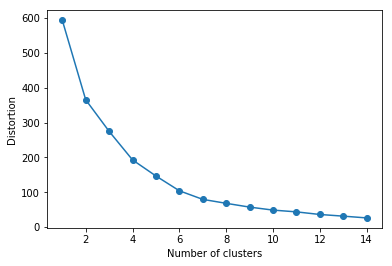

In [324]:
#choosing K using elbow method
def k_mean( df, kclusters = 5):
  kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df)   # run k-means clustering
  return kmeans.labels_, kmeans.inertia_

distortions = []
for k in range(1,15):
  _ , sum_dist= k_mean(scaled_df.drop('Neighborhood',1),kclusters = k)
  distortions.append(sum_dist)

# elbow plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [326]:
k = 5     #according to the elbow plot
cluster_labels , _= k_mean(scaled_df.drop('Neighborhood',1),kclusters = k)
scaled_df['cluster_labels'] = cluster_labels
#reorder the df
column_list = scaled_df.columns.to_list()
old_idx = column_list.index('cluster_labels')
column_list.insert(0, column_list.pop(old_idx))
final_dataframe_clustered = scaled_df[column_list]
final_dataframe_clustered

,cluster_labels,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips,Neighborhood
0,2,1.203530,3.273056,3.071864,0.853656,0.583880,0.703795,"Adelaide,King,Richmond"
1,1,0.398466,-0.360105,-0.430342,-0.503064,-0.494774,-0.383845,Agincourt
2,1,-1.211662,-0.360105,-0.455448,-0.503064,-0.494774,-0.383845,"Agincourt North,L'Amoreaux East,Milliken,Steel..."
3,1,-1.211662,-0.360105,-0.380132,-0.503064,-0.494774,-0.383845,"Albion Gardens,Beaumond Heights,Humbergate,Jam..."
4,1,-2.016727,-0.360105,-0.392684,-0.503064,-0.494774,-0.383845,"Alderwood,Long Branch"
5,0,0.398466,-0.133032,-0.242052,0.701025,0.461971,-0.169747,"Bathurst Manor,Downsview North,Wilson Heights"
6,1,1.203530,-0.360105,-0.442895,-0.503064,-0.494774,-0.383845,Bayview Village
7,0,2.813659,0.094040,-0.166735,1.349381,0.079940,-0.246656,"Bedford Park,Lawrence Manor East"
8,0,-0.406598,1.002330,1.565538,0.377977,1.125616,1.614059,Berczy Park
9,1,-1.211662,-0.360105,-0.442895,-0.503064,-0.494774,-0.383845,"Birch Cliff,Cliffside West"


In [327]:
final_dataframe_clustered = pd.merge(final_dataframe_clustered[['cluster_labels','Neighborhood']], final_dataframe, left_on = 'Neighborhood',right_on = 'Neighborhood')
final_dataframe_clustered

,cluster_labels,Neighborhood,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips
0,2,"Adelaide,King,Richmond",4,16.0,284,0.056338,145.550000,523.250000
1,1,Agincourt,3,0.0,5,0.000000,0.000000,0.000000
2,1,"Agincourt North,L'Amoreaux East,Milliken,Steel...",1,0.0,3,0.000000,0.000000,0.000000
3,1,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",1,0.0,9,0.000000,0.000000,0.000000
4,1,"Alderwood,Long Branch",0,0.0,8,0.000000,0.000000,0.000000
5,0,"Bathurst Manor,Downsview North,Wilson Heights",3,1.0,20,0.050000,129.100000,103.000000
6,1,Bayview Village,4,0.0,4,0.000000,0.000000,0.000000
7,0,"Bedford Park,Lawrence Manor East",6,2.0,26,0.076923,77.550000,66.000000
8,0,Berczy Park,2,6.0,164,0.036585,218.650000,961.166667
9,1,"Birch Cliff,Cliffside West",1,0.0,4,0.000000,0.000000,0.000000


#### Results

In [328]:
final_dataframe_clustered[final_dataframe_clustered['cluster_labels']==0]

,cluster_labels,Neighborhood,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips
5,0,"Bathurst Manor,Downsview North,Wilson Heights",3,1.0,20,0.050000,129.100000,103.000000
7,0,"Bedford Park,Lawrence Manor East",6,2.0,26,0.076923,77.550000,66.000000
8,0,Berczy Park,2,6.0,164,0.036585,218.650000,961.166667
11,0,"Brockton,Exhibition Place,Parkdale Village",1,1.0,25,0.040000,143.400000,259.000000
12,0,Business Reply Mail Processing Centre 969 Eastern,2,1.0,15,0.066667,70.200000,158.000000
15,0,"Cabbagetown,St. James Town",2,3.0,44,0.068182,94.233333,153.333333
21,0,Christie,2,1.0,18,0.055556,82.000000,149.000000
22,0,Church and Wellesley,4,5.0,139,0.035971,215.720000,459.000000
27,0,Davisville,3,1.0,37,0.027027,224.300000,284.000000
29,0,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",3,1.0,14,0.071429,88.100000,104.000000


In [329]:
final_dataframe_clustered[final_dataframe_clustered['cluster_labels']==1]

,cluster_labels,Neighborhood,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips
1,1,Agincourt,3,0.0,5,0.0,0.0,0.0
2,1,"Agincourt North,L'Amoreaux East,Milliken,Steel...",1,0.0,3,0.0,0.0,0.0
3,1,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",1,0.0,9,0.0,0.0,0.0
4,1,"Alderwood,Long Branch",0,0.0,8,0.0,0.0,0.0
6,1,Bayview Village,4,0.0,4,0.0,0.0,0.0
9,1,"Birch Cliff,Cliffside West",1,0.0,4,0.0,0.0,0.0
10,1,"Bloordale Gardens,Eringate,Markland Wood,Old B...",0,0.0,9,0.0,0.0,0.0
13,1,"CFB Toronto,Downsview East",2,0.0,3,0.0,0.0,0.0
14,1,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0,0.0,15,0.0,0.0,0.0
16,1,Caledonia-Fairbanks,3,0.0,4,0.0,0.0,0.0


In [330]:
final_dataframe_clustered[final_dataframe_clustered['cluster_labels']==2]

,cluster_labels,Neighborhood,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips
0,2,"Adelaide,King,Richmond",4,16.0,284,0.056338,145.550000,523.250000
26,2,"Commerce Court,Victoria Hotel",5,25.0,380,0.065789,123.816000,427.320000
31,2,"Design Exchange,Toronto Dominion Centre",5,21.0,354,0.059322,137.814286,491.380952
43,2,"First Canadian Place,Underground city",4,21.0,354,0.059322,138.228571,503.476190
80,2,St. James Town,2,10.0,275,0.036364,225.400000,871.000000
81,2,Stn A PO Boxes 25 The Esplanade,3,13.0,300,0.043333,186.630769,666.384615


In [331]:
final_dataframe_clustered[final_dataframe_clustered['cluster_labels']==3]

,cluster_labels,Neighborhood,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips
19,3,Central Bay Street,2,1.0,115,0.008696,873.10,3434.0
72,3,Queen's Park,3,1.0,76,0.013158,566.30,1098.0
77,3,"Ryerson,Garden District",3,2.0,143,0.013986,568.55,2613.5


In [334]:
finaldataframe_map = pd.merge(final_dataframe_clustered, df_merge_col, left_on = 'Neighborhood',right_on = 'Neighborhood')
finaldataframe_map

,cluster_labels,Neighborhood,Top Venue Restaurants,Restaurant,Venues,Restaurant_Ratio,Average_Rating,Average_Tips,PostalCode,Borough,Postal Code,Latitude,Longitude
0,2,"Adelaide,King,Richmond",4,16.0,284,0.056338,145.550000,523.250000,M5H,Downtown Toronto,M5H,43.650571,-79.384568
1,1,Agincourt,3,0.0,5,0.000000,0.000000,0.000000,M1S,Scarborough,M1S,43.794200,-79.262029
2,1,"Agincourt North,L'Amoreaux East,Milliken,Steel...",1,0.0,3,0.000000,0.000000,0.000000,M1V,Scarborough,M1V,43.815252,-79.284577
3,1,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",1,0.0,9,0.000000,0.000000,0.000000,M9V,Etobicoke,M9V,43.739416,-79.588437
4,1,"Alderwood,Long Branch",0,0.0,8,0.000000,0.000000,0.000000,M8W,Etobicoke,M8W,43.602414,-79.543484
5,0,"Bathurst Manor,Downsview North,Wilson Heights",3,1.0,20,0.050000,129.100000,103.000000,M3H,North York,M3H,43.754328,-79.442259
6,1,Bayview Village,4,0.0,4,0.000000,0.000000,0.000000,M2K,North York,M2K,43.786947,-79.385975
7,0,"Bedford Park,Lawrence Manor East",6,2.0,26,0.076923,77.550000,66.000000,M5M,North York,M5M,43.733283,-79.419750
8,0,Berczy Park,2,6.0,164,0.036585,218.650000,961.166667,M5E,Downtown Toronto,M5E,43.644771,-79.373306
9,1,"Birch Cliff,Cliffside West",1,0.0,4,0.000000,0.000000,0.000000,M1N,Scarborough,M1N,43.692657,-79.264848


#### Plot on map

In [335]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(finaldataframe_map['Latitude'], finaldataframe_map['Longitude'], finaldataframe_map['Neighborhood'], finaldataframe_map['cluster_labels']):
    label = folium.Popup(str(poi) + ' | Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Discusion to describe each cluster

In [353]:
final_dataframe_clustered.groupby(['cluster_labels'],as_index=False).describe()

cluster_labels                                    Top Venue Restaurants  \
           count mean  std  min  25%  50%  75%  max                 count   
0           24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                  24.0   
1           64.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0                  64.0   
2            6.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0                   6.0   
3            3.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0                   3.0   
4            2.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0                   2.0   

             ... Average_Rating        Average_Tips                            \
       mean  ...            75%    max        count         mean          std   
0  2.708333  ...     216.452500  315.9         24.0   318.722222   285.032453   
1  2.281250  ...       0.000000    0.0         64.0     0.000000     0.000000   
2  3.833333  ...     176.360577  225.4          6.0   580.468626   162.716292   
3  2.666667  ...     720.825000  873.1          3.0  2381.833333  1185.105938   
4  3.000000  ...       8.850000   11.8          2.0     2.000000     2.828427   

                                                           
       min          25%          50%          75%     max  
0    37.00   127.250000   177.250000   475.750000  1050.0  
1     0.00     0.000000     0.000000     0.000000     0.0  
2   427.32   494.404762   513.363095   630.600962   871.0  
3  1098.00  1855.750000  2613.500000  3023.750000  3434.0  
4     0.00     1.000000     2.000000     3.000000     4.0  

[5 rows x 56 columns]

In [354]:
final_dataframe_clustered.groupby(['cluster_labels'],as_index=False).describe()['Top Venue Restaurants']

,count,mean,std,min,25%,50%,75%,max
0,24.0,2.708333,1.267629,0.0,2.00,2.5,3.00,6.0
1,64.0,2.281250,1.214577,0.0,1.00,2.0,3.00,5.0
2,6.0,3.833333,1.169045,2.0,3.25,4.0,4.75,5.0
3,3.0,2.666667,0.577350,2.0,2.50,3.0,3.00,3.0
4,2.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0


In [355]:
final_dataframe_clustered.groupby(['cluster_labels'],as_index=False).describe()['Restaurant']

,count,mean,std,min,25%,50%,75%,max
0,24.0,1.875000,1.392917,1.0,1.00,1.0,2.0,6.0
1,64.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
2,6.0,17.666667,5.645057,10.0,13.75,18.5,21.0,25.0
3,3.0,1.333333,0.577350,1.0,1.00,1.0,1.5,2.0
4,2.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0


In [356]:
final_dataframe_clustered.groupby(['cluster_labels'],as_index=False).describe()['Venues']

,count,mean,std,min,25%,50%,75%,max
0,24.0,44.500000,41.212071,13.0,20.0,33.5,45.0,164.0
1,64.0,8.312500,12.119609,1.0,3.0,4.0,9.0,88.0
2,6.0,324.500000,43.615364,275.0,288.0,327.0,354.0,380.0
3,3.0,111.333333,33.650161,76.0,95.5,115.0,129.0,143.0
4,2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


In [357]:
final_dataframe_clustered.groupby(['cluster_labels'],as_index=False).describe()['Restaurant_Ratio']

,count,mean,std,min,25%,50%,75%,max
0,24.0,0.050491,0.020369,0.016129,0.034791,0.050000,0.067045,0.095238
1,64.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,6.0,0.053411,0.011170,0.036364,0.046585,0.057830,0.059322,0.065789
3,3.0,0.011947,0.002846,0.008696,0.010927,0.013158,0.013572,0.013986
4,2.0,0.250000,0.000000,0.250000,0.250000,0.250000,0.250000,0.250000


In [358]:
final_dataframe_clustered.groupby(['cluster_labels'],as_index=False).describe()['Average_Rating']

,count,mean,std,min,25%,50%,75%,max
0,24.0,151.348403,74.444473,51.600,92.700000,132.275000,216.452500,315.9
1,64.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0
2,6.0,159.573271,38.651134,123.816,137.917857,141.889286,176.360577,225.4
3,3.0,669.316667,176.485129,566.300,567.425000,568.550000,720.825000,873.1
4,2.0,5.900000,8.343860,0.000,2.950000,5.900000,8.850000,11.8


In [359]:
final_dataframe_clustered.groupby(['cluster_labels'],as_index=False).describe()['Average_Tips']

,count,mean,std,min,25%,50%,75%,max
0,24.0,318.722222,285.032453,37.00,127.250000,177.250000,475.750000,1050.0
1,64.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0
2,6.0,580.468626,162.716292,427.32,494.404762,513.363095,630.600962,871.0
3,3.0,2381.833333,1185.105938,1098.00,1855.750000,2613.500000,3023.750000,3434.0
4,2.0,2.000000,2.828427,0.00,1.000000,2.000000,3.000000,4.0


Create map for cluster , as that sems to be our option for opening the restaurent

In [362]:
# create map
map_cluster_two = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(finaldataframe_map['Latitude'], finaldataframe_map['Longitude'], finaldataframe_map['Neighborhood'], finaldataframe_map['cluster_labels']):
    if cluster == 2:
        label = folium.Popup(str(poi) + ' | Cluster: ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_cluster_zero)     
map_cluster_two

In [363]:
for neighbour, restau in zip(final_dataframe_clustered[final_dataframe_clustered['cluster_labels']==2]['Neighborhood'],final_dataframe_clustered[final_dataframe_clustered['cluster_labels']==3]['Restaurant']):
    print('{} \t({} restaurant)'.format(neighbour, restau))

Adelaide,King,Richmond 	(1.0 restaurant)
Commerce Court,Victoria Hotel 	(1.0 restaurant)
Design Exchange,Toronto Dominion Centre 	(2.0 restaurant)
